# Winnining Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [206]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [207]:
# Bring each CSV into a separate data frame
# Read CSV
wrestling_data_one = pd.read_csv("WWE-Data-2013.csv")
wrestling_data_two = pd.read_csv("WWE-Data-2014.csv")
wrestling_data_thr = pd.read_csv("WWE-Data-2015.csv")
wrestling_data_for = pd.read_csv("WWE-Data-2016.csv")

In [208]:
# Merge the first two datasets (2013 and 2014) on "Wrestler" so that no data is lost (should be 182 rows)
combined_onetwo_data = pd.merge(wrestling_data_one, wrestling_data_two, on="Wrestler")
combined_trefor_data = pd.merge(wrestling_data_thr, wrestling_data_for, on="Wrestler")
combined_onetwo_data.head()

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177,37,6,35,16,2
1,Dean Ambrose,70,134,4,129,36,2
2,Antonio Cesaro,80,126,1,5,24,0
3,Seth Rollins,50,150,4,87,105,4
4,Randy Orton,129,63,8,33,87,5


In [209]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_onetwo_data = combined_onetwo_data.rename(columns={"Wins_x":"2013 Wins", "Losses_x":"2013 Losses", "Draws_x": "2013 Draws"})
# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_onetwo_data = combined_onetwo_data.rename(columns={"Wins_y":"2014 Wins", "Losses_y":"2014 Losses", "Draws_y": "2014 Draws"})
combined_onetwo_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177,37,6,35,16,2
1,Dean Ambrose,70,134,4,129,36,2
2,Antonio Cesaro,80,126,1,5,24,0
3,Seth Rollins,50,150,4,87,105,4
4,Randy Orton,129,63,8,33,87,5


In [210]:
# Merge our newly combined dataframe with the 2015 dataframe

combined_onefor_data = pd.merge(combined_onetwo_data, combined_trefor_data, on="Wrestler")
# combined_trefor_data = pd.merge(wrestling_data_thr, wrestling_data_for, on="Wrestler")
combined_onefor_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1


In [211]:
combined_onefor_data = combined_onefor_data.rename(columns={"Wins_x":"2015 Wins", "Losses_x":"2015 Losses", "Draws_x": "2015 Draws"})
# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_onefor_data = combined_onefor_data.rename(columns={"Wins_y":"2016 Wins", "Losses_y":"2016 Losses", "Draws_y": "2016 Draws"})
combined_onefor_data.head(20)

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1
5,Damien Sandow,39,147,3,3,113,0,50,9,2,11,18,0
6,Alberto Del Rio,126,53,4,31,82,1,26,13,2,24,65,2
7,Dolph Ziggler,62,117,1,134,60,2,115,52,2,114,56,2
8,Jack Swagger,56,96,2,49,123,1,65,65,0,73,70,0
9,Kofi Kingston,66,79,4,82,72,1,86,90,1,95,39,1


In [213]:
# Replace all NaN values with 0 

combinedNA_df = combined_onefor_data.fillna(0)
#combinedNA_df.head(5)
# df['column']=df['column'].fillna(value)

In [214]:
# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
combinedNA_df['Total Wins'] = combinedNA_df['2013 Wins'] + combinedNA_df['2014 Wins'] + combinedNA_df['2015 Wins'] + combinedNA_df['2016 Wins']
combinedNA_df.head(10)

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321
5,Damien Sandow,39,147,3,3,113,0,50,9,2,11,18,0,103
6,Alberto Del Rio,126,53,4,31,82,1,26,13,2,24,65,2,207
7,Dolph Ziggler,62,117,1,134,60,2,115,52,2,114,56,2,425
8,Jack Swagger,56,96,2,49,123,1,65,65,0,73,70,0,243
9,Kofi Kingston,66,79,4,82,72,1,86,90,1,95,39,1,329


In [215]:
# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
combinedNA_df['Total Losses'] = combinedNA_df['2013 Losses'] + combinedNA_df['2014 Losses'] + combinedNA_df['2015 Losses'] + combinedNA_df['2016 Losses']
combinedNA_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482,300
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227,454
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282,181
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496,199
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321,253


In [216]:
# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
combinedNA_df['Total Draws'] = combinedNA_df['2013 Draws'] + combinedNA_df['2014 Draws'] + combinedNA_df['2015 Draws'] + combinedNA_df['2016 Draws']
combinedNA_df.head()

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
combinedNA_df['Total Matches'] = combinedNA_df['Total Losses'] + combinedNA_df['Total Wins'] + combinedNA_df['Total Draws']
combinedNA_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482,300,15,797
1,Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227,454,13,694
2,Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282,181,14,477
3,Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496,199,21,716
4,Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321,253,7,581


In [217]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
over_hunddf = combinedNA_df[combinedNA_df['Total Matches'] >= 100]
over_hunddf
# have at least one win in 2013,

onewin_df = over_hunddf[over_hunddf['2013 Wins'] >= 1]
# and have at least one win in 2016
twowin_df = onewin_df[onewin_df['2016 Wins'] >= 1]
# Set the index of this new dataframe to be the wrestlers names
twowin_df = twowin_df.set_index('Wrestler')

In [218]:
# Collect the user's input to search through our data frame
person = input("Enter the name to search for: ")

In [219]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
person_wins = twowin_df.loc[person,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]
# pwin_df = person_wins.set_index('2013 Wins')
# twowin_df.set_index('Wrestler')
# Create a series that looks for a wrestler by name and then traces their  from 2013 to 2016
person_losses = twowin_df.loc[twowin_df[person, ['2013 Losses','2014 Losses', '2015 Losses', '2016 Losses']]
# person_losses.set_index('2013 Losses')
person_wins

SyntaxError: invalid syntax (<ipython-input-219-4c456f7222c6>, line 8)

ValueError: x and y must have same first dimension, but have shapes (4,) and (1, 4)

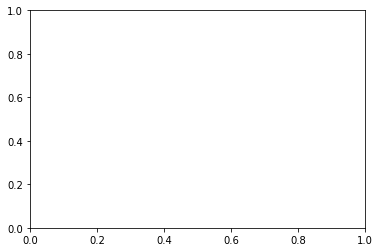

In [196]:
#
# pwin_df = list(person_wins.values)
# pwin_df = [1,24,19,35]
years = [2013,2014,2015,2016]
plt.plot(years, person_wins, color="green", label="Wins")
#pwin_df2 = np.array(pwin_df)
#pwin_df3 = pd.DataFrame(pwin_df2, columns=['2013', '2014', '2015','2016'])
#pwin_df3.plot()
# df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])

In [162]:
#years_list = np.array(['2013', '2014', '2015', '2016'])
#years_list

# years = [1,2,3,4]
years_list = np.array(years)
years_list

array(['2013', '2014', '2015', '2016'], dtype='<U4')

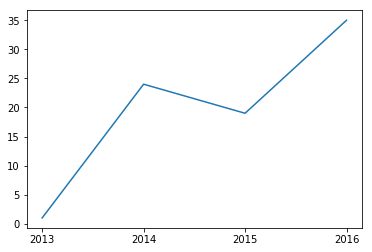

In [163]:
# Create a list of the years that we will use as our x axis
# pwin_df = np.array[(person_wins)]
# years_list = np.arange(2013, 2017, 1)

#years_list
# Plot our line that will be used to track a wrestler's wins over the years
first_line = plt.plot(years_list, pwin_df2)

# Plot our line that will be used to track a wrestler's losses over the years


# Place a legend on the chart in what matplotlib believes to be the "best" location



# Print our chart to the screen
# plt.show()

In [ ]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()